# Block Y1B: Creative Brief Template

Please, use this template to write down your solutions to the DataLab Tasks. If you have any questions, please, contact your mentor or the content responsible. 

## Important Notes:
- [ ] Please, rename the file to ```CreativeBrief_<your_name>_<studentnumber>.ipynb``` before submitting it. 
- [ ] Upload this template to the 'Deliverables' folder in your BUas GitHub repository.
- [ ] You are allowed to add as many (Markdown/Python) cells as you need. 
- [ ] If the task requires you to only write code or text, please, delete the unnecessary cell.
- [ ] Your work should be reproducible, meaning that we should be able to run your code in the template and get the same results as you did. Tip: use relative paths to load your data!
- [ ] Ensure that before you hand in the template, you press ```Restart & Run all```; we should be able to see the results of your code in the notebook (i.e., output cells).
- [ ] Ensure that your code in the template is ```error-free```. In other words, we should not see any error messages when we run your code.

## Project Overview
This project focuses on the analysis of diabetes patient data in order to apply in machine learning algorithms. <br>
It will involve the students working on a wide variety of machine learning techniques, ranging from basic data analysis to the optimisation of advanced models. 


## Required Libraries

In [216]:
%pip install sqlalchemy pymysql
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy
import sklearn

Note: you may need to restart the kernel to use updated packages.


## *Task 1: Exploratory Data Analysis (EDA) with Python and SQL
_________


### **Task 1A: Exploratory Data Analysis with SQL**

### Task Description
Etablish a connection between Python and a database with performing basic operations using SQL and perform exploratory data analysis with sql to understand the dataset's characteristics, patterns.

### Task 1A.1: General Overview of the Data

In [217]:
""" SELECT COUNT(*) AS total_records
FROM encounter;

# Check the distribution of different admission types
SELECT discharge_disposition_id , COUNT(*) AS frequency
FROM discharge_disposition dd 
GROUP BY discharge_disposition_id 
ORDER BY frequency DESC;
  
# Explore the top discharge dispositions
SELECT discharge_disposition_id , COUNT(*) AS frequency
FROM encounter
GROUP BY discharge_disposition_id 
ORDER BY frequency DESC
LIMIT 10; """

' SELECT COUNT(*) AS total_records\nFROM encounter;\n\n# Check the distribution of different admission types\nSELECT discharge_disposition_id , COUNT(*) AS frequency\nFROM discharge_disposition dd \nGROUP BY discharge_disposition_id \nORDER BY frequency DESC;\n  \n# Explore the top discharge dispositions\nSELECT discharge_disposition_id , COUNT(*) AS frequency\nFROM encounter\nGROUP BY discharge_disposition_id \nORDER BY frequency DESC\nLIMIT 10; '

### Task 1A.2: Identifying Missing or Anomalous Data

In [218]:
#Check for missing values in the race column (Hint: Count the occurance of each unique value in this column)
""" SELECT 
    CASE 
        WHEN race IS NULL OR race = '' THEN 'Missing' 
        ELSE race 
    END AS race_category,
    COUNT(*) AS frequency
FROM patient
GROUP BY race_category
ORDER BY frequency DESC;

#Check for missing or unusual values in the weight column
SELECT 
    CASE 
        WHEN weight IS NULL OR weight = '' THEN 'Missing' 
        ELSE 'Present' 
    END AS weight_status,
    COUNT(*) AS frequency
FROM patient
GROUP BY weight_status; """

" SELECT \n    CASE \n        WHEN race IS NULL OR race = '' THEN 'Missing' \n        ELSE race \n    END AS race_category,\n    COUNT(*) AS frequency\nFROM patient\nGROUP BY race_category\nORDER BY frequency DESC;\n\n#Check for missing or unusual values in the weight column\nSELECT \n    CASE \n        WHEN weight IS NULL OR weight = '' THEN 'Missing' \n        ELSE 'Present' \n    END AS weight_status,\n    COUNT(*) AS frequency\nFROM patient\nGROUP BY weight_status; "

### Task 1A.3: Understanding Age Distribution

In [219]:
# Explore the age distribution of the patients
""" SELECT age, COUNT(*) AS frequency
FROM patient
GROUP BY age
ORDER BY frequency DESC; """

' SELECT age, COUNT(*) AS frequency\nFROM patient\nGROUP BY age\nORDER BY frequency DESC; '

### Task 1A.4: Admission Trends by Source and Type

In [220]:
# Analyze how different admission sources contribute to hospital admissions 
# (Hint: Calculate the number of admissions per source)
"""Improve this function

SELECT 
    admission_source.admission_source_id,
    COUNT(encounter.encounter_id) AS encounters_count
FROM admission_source
JOIN encounter
    ON admission_source.admission_source_id = encounter.admission_source_id
GROUP BY admission_source.admission_source_id
ORDER BY encounters_count DESC;

#Investigate which admission types correspond to specific admission sources
# (Hint: add admission type to your previous query)

SELECT 
    admission_source.admission_source_id , 
    admission_type.admission_type_id AS admission_type, 
    COUNT(encounter.encounter_id) AS encounters_count
FROM admission_source
JOIN encounter
    ON admission_source.admission_source_id = encounter.admission_source_id
JOIN admission_type
    ON encounter.admission_type_id = admission_type.admission_type_id
GROUP BY admission_source.admission_source_id, admission_type.admission_type_id 
ORDER BY encounters_count DESC; """


'Improve this function\n\nSELECT \n    admission_source.admission_source_id,\n    COUNT(encounter.encounter_id) AS encounters_count\nFROM admission_source\nJOIN encounter\n    ON admission_source.admission_source_id = encounter.admission_source_id\nGROUP BY admission_source.admission_source_id\nORDER BY encounters_count DESC;\n\n#Investigate which admission types correspond to specific admission sources\n# (Hint: add admission type to your previous query)\n\nSELECT \n    admission_source.admission_source_id , \n    admission_type.admission_type_id AS admission_type, \n    COUNT(encounter.encounter_id) AS encounters_count\nFROM admission_source\nJOIN encounter\n    ON admission_source.admission_source_id = encounter.admission_source_id\nJOIN admission_type\n    ON encounter.admission_type_id = admission_type.admission_type_id\nGROUP BY admission_source.admission_source_id, admission_type.admission_type_id \nORDER BY encounters_count DESC; '

### Task 1A.5: Hospital Stay and Readmission Patterns

In [221]:
# Find the average time in hospital for each admission type
""" SELECT 
    admission_type.admission_type_id AS admission_type,
    AVG(encounter.time_in_hospital) AS avg_time_in_hospital_days
FROM encounter
JOIN admission_type
    ON encounter.admission_type_id = admission_type.admission_type_id
GROUP BY admission_type.admission_type_id 
ORDER BY avg_time_in_hospital_days DESC;

#Investigate readmission rates by admission type

select readmitted, admission_type_id
from encounter 
group by admission_type_id, readmitted 
order by readmitted """


' SELECT \n    admission_type.admission_type_id AS admission_type,\n    AVG(encounter.time_in_hospital) AS avg_time_in_hospital_days\nFROM encounter\nJOIN admission_type\n    ON encounter.admission_type_id = admission_type.admission_type_id\nGROUP BY admission_type.admission_type_id \nORDER BY avg_time_in_hospital_days DESC;\n\n#Investigate readmission rates by admission type\n\nselect readmitted, admission_type_id\nfrom encounter \ngroup by admission_type_id, readmitted \norder by readmitted '

### Task 1A.6: Comparing Admission Types and Outcomes

In [222]:
# Compare discharge dispositions across different admission types
""" SELECT 
    admission_type.admission_type_id AS admission_type,
    discharge_disposition.description AS discharge_disposition,
    COUNT(encounter.encounter_id) AS total_encounters
FROM encounter
JOIN admission_type
    ON encounter.admission_type_id = admission_type.admission_type_id
JOIN discharge_disposition
    ON encounter.discharge_disposition_id = discharge_disposition.discharge_disposition_id
GROUP BY admission_type.admission_type_id , discharge_disposition.description
ORDER BY admission_type.admission_type_id , total_encounters DESC;


# Compare readmission rates by discharge disposition

select readmitted, discharge_disposition_id 
from encounter 
group by discharge_disposition_id , readmitted 
order by readmitted """

' SELECT \n    admission_type.admission_type_id AS admission_type,\n    discharge_disposition.description AS discharge_disposition,\n    COUNT(encounter.encounter_id) AS total_encounters\nFROM encounter\nJOIN admission_type\n    ON encounter.admission_type_id = admission_type.admission_type_id\nJOIN discharge_disposition\n    ON encounter.discharge_disposition_id = discharge_disposition.discharge_disposition_id\nGROUP BY admission_type.admission_type_id , discharge_disposition.description\nORDER BY admission_type.admission_type_id , total_encounters DESC;\n\n\n# Compare readmission rates by discharge disposition\n\nselect readmitted, discharge_disposition_id \nfrom encounter \ngroup by discharge_disposition_id , readmitted \norder by readmitted '

+++++
### **Task 1B: Exploratory Data Analysis with Python**

### Task Description
Perform comprehensive exploratory data analysis to understand the dataset's characteristics, patterns, and potential challenges. <br>
It is crucial to understand the structure and quality of the dataset before diving into any analysis or modeling.

### 1B.1: Loading the data:

In [223]:
import pandas as pd
import numpy as np
# Load the dataset
df = pd.read_excel('diabetic_data_233172.xlsx')

# Display first few rows
display(df.head(10))

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


### 1B.2: Analysing the dataset shape:

In [224]:
# Dataset shape
rows, columns = df.shape

print(f"The dataset has {rows} rows and {columns} columns.")

# Column names
column_names = df.columns.tolist()
print(f"The column names are: {column_names}")

The dataset has 101766 rows and 50 columns.
The column names are: ['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']


### 1B.3: Load and Explore a Dataset Using NumPy

In [225]:
import numpy as np
# Load the dataset into a pandas DataFrame
df = pd.read_excel('diabetic_data_233172.xlsx')

# Convert the DataFrame to a NumPy array
data = df.to_numpy()

# Check the shape of the dataset
print("Dataset shape:", data.shape)

# Preview the first 5 rows
print("First 5 rows of the dataset:\n", data[:5])


Dataset shape: (101766, 50)
First 5 rows of the dataset:
 [[2278392 8222157 'Caucasian' 'Female' '[0-10)' '?' 6 25 1 1 '?'
  'Pediatrics-Endocrinology' 41 0 1 0 0 0 250.83 '?' '?' 1 nan nan 'No'
  'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
  'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'NO']
 [149190 55629189 'Caucasian' 'Female' '[10-20)' '?' 1 1 7 3 '?' '?' 59 0
  18 0 0 0 276 250.01 255 9 nan nan 'No' 'No' 'No' 'No' 'No' 'No' 'No'
  'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Up' 'No' 'No' 'No'
  'No' 'No' 'Ch' 'Yes' '>30']
 [64410 86047875 'AfricanAmerican' 'Female' '[20-30)' '?' 1 1 7 2 '?' '?'
  11 5 13 2 0 1 648 250 'V27' 6 nan nan 'No' 'No' 'No' 'No' 'No' 'No'
  'Steady' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
  'No' 'No' 'No' 'No' 'No' 'Yes' 'NO']
 [500364 82442376 'Caucasian' 'Male' '[30-40)' '?' 1 1 7 2 '?' '?' 44 1
  16 0 0 0 8 250.43 403 7 nan nan 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
  'No' 'No' 'No' 'No' 'No' '

### 1B.4: Analysing data types:

In [226]:
# Data types# Using Pandas
print("Data types:\n", df.dtypes)

# Unique values in categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    print(f"Unique values in '{col}': {df[col].unique()}")


Data types:
 encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepi

### Task 1B.5: Identify Metadata from the Dataset

In [227]:
# different data statistics
print("Statistical Summary:\n", df.describe())

categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"Column '{col}': Unique Values Count:\n", df[col].value_counts())

# check for missing values and percentage of missing values
print("Missing Values:\n", df.isnull().sum())

missing_percentage = df.isnull().mean() * 100
print("Percentage of Missing Values:\n", missing_percentage)




Statistical Summary:
        encounter_id   patient_nbr  admission_type_id  \
count  1.017660e+05  1.017660e+05      101766.000000   
mean   1.652016e+08  5.433040e+07           2.024006   
std    1.026403e+08  3.869636e+07           1.445403   
min    1.252200e+04  1.350000e+02           1.000000   
25%    8.496119e+07  2.341322e+07           1.000000   
50%    1.523890e+08  4.550514e+07           1.000000   
75%    2.302709e+08  8.754595e+07           3.000000   
max    4.438672e+08  1.895026e+08           8.000000   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
count             101766.000000        101766.000000     101766.000000   
mean                   3.715642             5.754437          4.395987   
std                    5.280166             4.064081          2.985108   
min                    1.000000             1.000000          1.000000   
25%                    1.000000             1.000000          2.000000   
50%                    1.0000

### Task 1B.6: Splitting Data for Analysis

In [228]:
print("Available columns:", df.columns.tolist())


Available columns: ['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']


In [229]:
from sklearn.model_selection import train_test_split

X = df.drop('race', axis=1)  
y = df['race']               

# Specifies the size of the test set as 20% of the data and sets a seed for the random number generator to ensure reproducibility of the split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)



Training Set Shape: (81412, 49)
Testing Set Shape: (20354, 49)


### 1B.5: Exploratory Data Analysis (EDA) with Visualisations

In [230]:
print("Available columns:", df.columns.tolist())

Available columns: ['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']


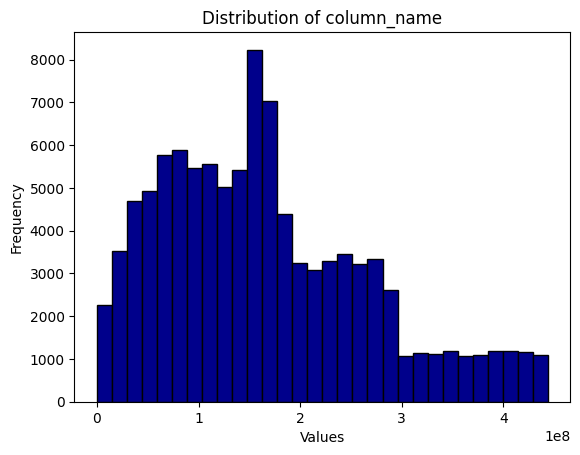

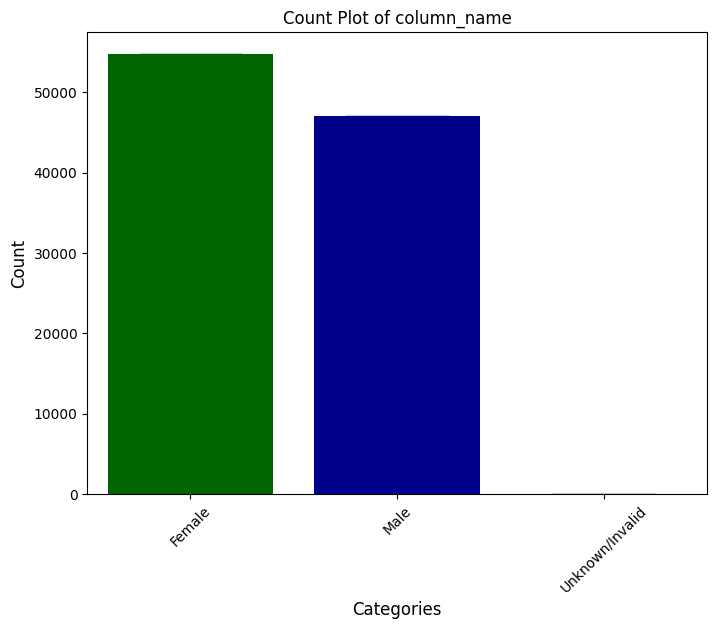

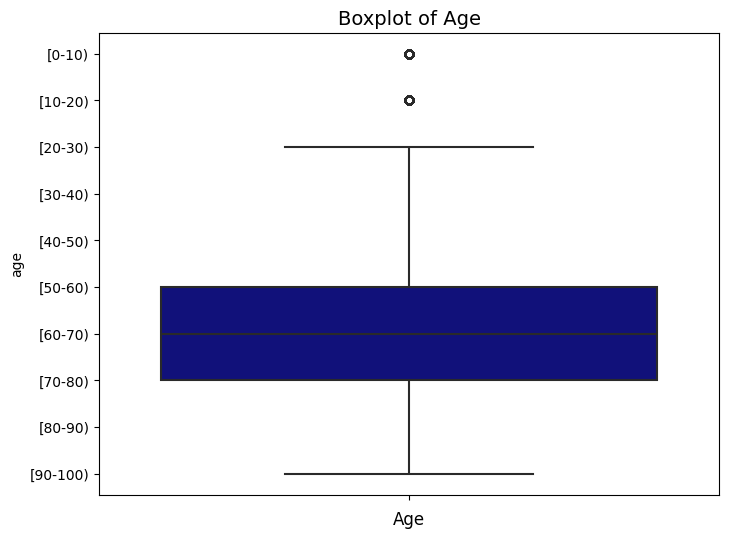

In [231]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of a numeric column
plt.hist(df['encounter_id'], bins=30, color='darkblue', edgecolor='black')
plt.title('Distribution of column_name')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()


# Count plot of a categorical variable
df['gender'].value_counts().plot(
    kind='bar', 
    colormap='viridis', 
    edgecolor='black', 
    figsize=(8, 6), 
    title='Count Plot of column_name'
)
colors = ['darkgreen', 'darkblue']
plt.bar(df['gender'].value_counts().index, df['gender'].value_counts(), color=colors)
plt.xlabel('Categories', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Boxplot to detect outliers
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['age'], color="darkblue", linewidth=1.5)

# Add title and labels
plt.title('Boxplot of Age', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.show()


### More graphs 

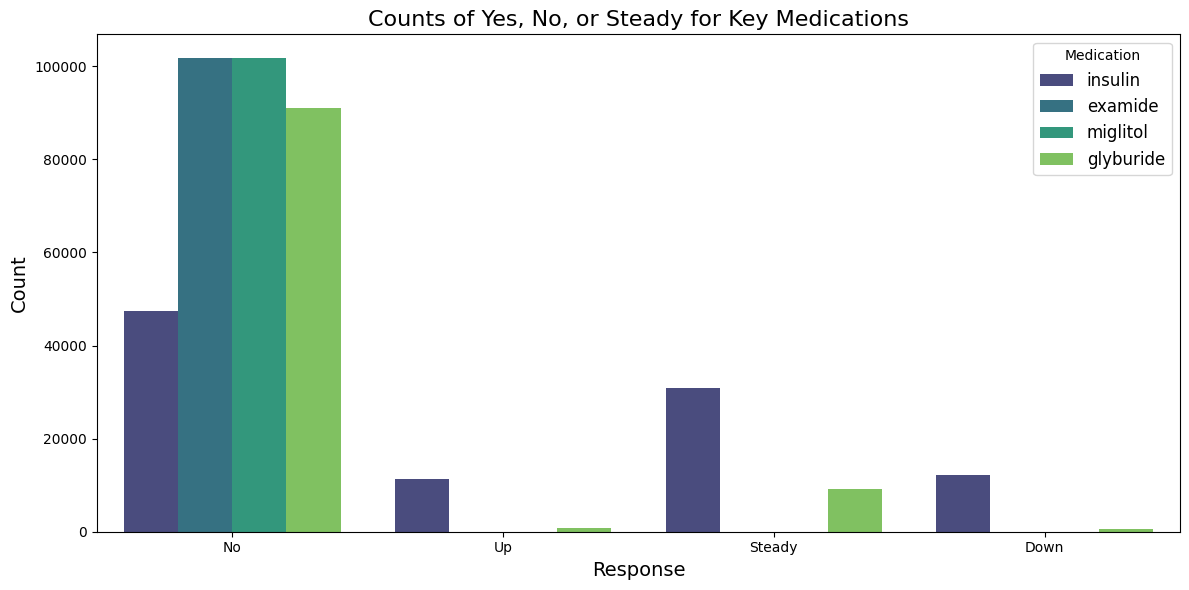

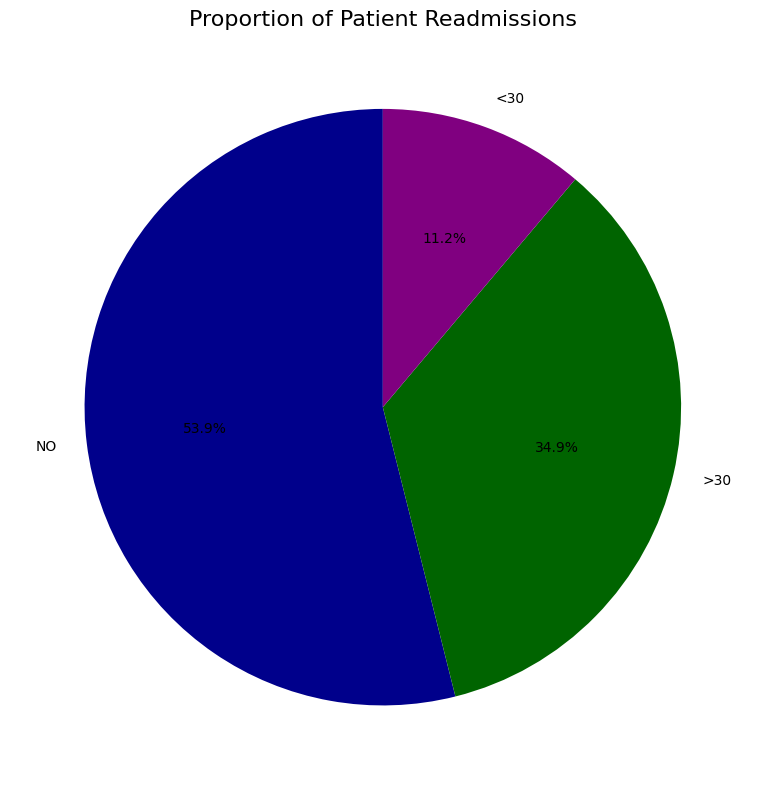

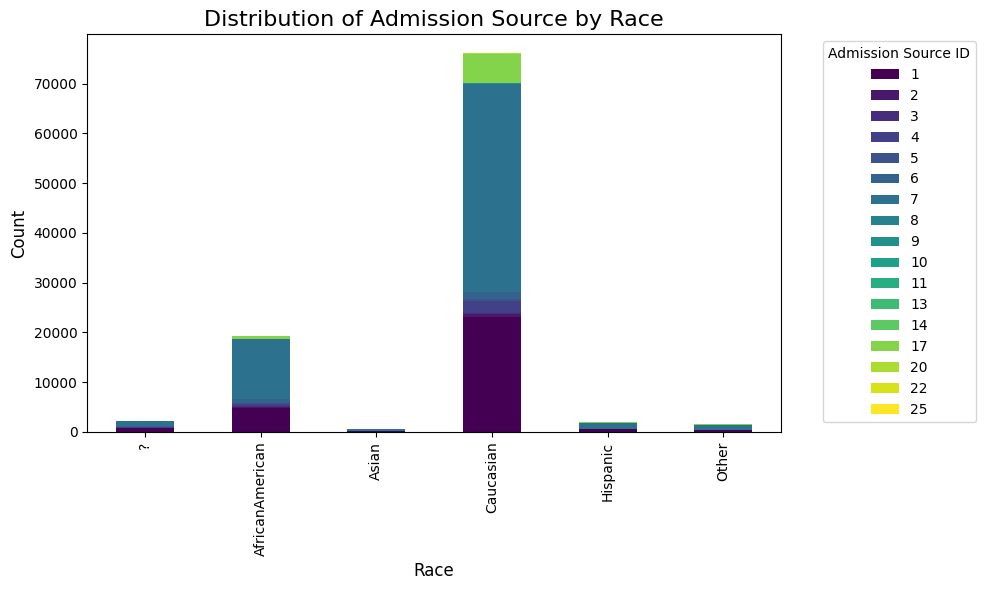

In [232]:
columns_to_plot = ['insulin', 'examide', 'miglitol', 'glyburide']

# Melt the DataFrame for easier visualization with Seaborn
melted_df = df[columns_to_plot].melt(var_name='Medication', value_name='Response')

# Create the count plot using Seaborn
plt.figure(figsize=(12, 6))
sns.countplot(data=melted_df, x='Response', hue='Medication', palette='viridis')

# Add title and labels
plt.title('Counts of Yes, No, or Steady for Key Medications', fontsize=16)
plt.xlabel('Response', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title="Medication", fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

# Create a pie chart for readmitted
readmitted_counts = df['readmitted'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(readmitted_counts, labels=readmitted_counts.index, autopct='%1.1f%%', startangle=90, colors=['darkblue', 'darkgreen', 'purple'])

# Add a title
plt.title('Proportion of Patient Readmissions', fontsize=16)

plt.tight_layout()
plt.show()

grouped_data = df.groupby(['race', 'admission_source_id']).size().unstack()

# Create a stacked bar chart
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Add titles and labels
plt.title('Distribution of Admission Source by Race', fontsize=16)
plt.xlabel('Race', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Admission Source ID', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

_________
## *Task 2: Data Processing
### Task Description
Create a robust data preprocessing pipeline to handle missing values, encode categorical variables, and scale numerical features.

### **Task 2.1: Initial Cleaning and Pre-processing**

#### 2.1.1: Load and Visualise the Data
- Use pandas to load the dataset.
- Visualise the first few rows to understand the structure of the data.

In [233]:
# visualise the first few rows of the data
print(df.head(10))
    

   encounter_id  patient_nbr             race  gender       age weight  \
0       2278392      8222157        Caucasian  Female    [0-10)      ?   
1        149190     55629189        Caucasian  Female   [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female   [20-30)      ?   
3        500364     82442376        Caucasian    Male   [30-40)      ?   
4         16680     42519267        Caucasian    Male   [40-50)      ?   
5         35754     82637451        Caucasian    Male   [50-60)      ?   
6         55842     84259809        Caucasian    Male   [60-70)      ?   
7         63768    114882984        Caucasian    Male   [70-80)      ?   
8         12522     48330783        Caucasian  Female   [80-90)      ?   
9         15738     63555939        Caucasian  Female  [90-100)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                       

#### 2.1.2: Display Data Types and Check for Incorrect Types

- Use the .dtypes attribute to display each column's data type.
- Identify columns that have unexpected data types (e.g., numeric data stored as strings).

In [234]:
# Display data types of each column
print(df.dtypes)

for col in df.columns:
    if df[col].apply(type).nunique() > 1:
        print(f"{col} contains mixed data types.")
    else:
        print(f"{col} contains only one data type.")

# Check numeric-like columns for strings
for col in df.columns:
    if df[col].dtype == 'object':  
        if df[col].str.isdigit().all():
            print(f"{col} contains numeric data stored as strings.")


encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

#### 2.1.3: Identify and Remove Duplicate Rows

- Check for duplicate rows.
- If duplicates exist, remove them 

In [235]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Drop duplicates if any
df = df.drop_duplicates()

df.reset_index(drop=True, inplace=True)

Number of duplicate rows: 0


### Task 2.2: Handling Metadata and Missing Values
#### 2.2.1: Identify Metadata from the Dataset
Metadata includes information like column names, data types, and any additional descriptive information.

In [236]:
# Display metadata including column names and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_


#### 2.2.2: Analyse Different Types of Data
- Categorize columns based on their data types (e.g., numerical, categorical).
- Describe the significance of each data type and how it might impact data processing.

In [237]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

Numerical Columns: ['encounter_id', 'patient_nbr', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']
Categorical Columns: ['race', 'gender', 'age', 'weight', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']


#### 2.2.3: Identify Missing Values
- Missing values can significantly impact model performance and analysis.
- Count missing values in each column.
- Calculate the percentage of missing values.

In [238]:
# Identify and calculate the percentage of missing values in each column of the dataset
missing_values = df.isnull().sum()
missing_percentages = (missing_values / len(df)) * 100
print(f"Missing values (in percentage) for each column: {missing_percentages}\n")

Missing values (in percentage) for each column: encounter_id                 0.000000
patient_nbr                  0.000000
race                         0.000000
gender                       0.000000
age                          0.000000
weight                       0.000000
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                   0.000000
medical_specialty            0.000000
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.000000
diag_2                       0.000000
diag_3                       0.000000
number_diagnoses             0.000000
max_glu_serum               94.746772
A1Cresult                   83.277322
metformin                    0.000000
re

#### 2.2.4: Splitting Data for Analysis
Splitting data ensures that models are trained on one portion of the data and tested on another, unseen portion.

In [239]:
# Features and target
X = df.drop(columns=['encounter_id', 'max_glu_serum', 'A1Cresult', 'patient_nbr' ])
y = df['time_in_hospital']


___________
## *Task 3: Machine Learning
### Task Description
Implement various machine learning algorithms for regression, classification and clustering and evaluating them.

### **Task 3.1: Implementing Regression Baseline**
#### 3.1.1: Loading the data
- Use pandas to load the dataset.

#### 3.1.2: Start to implement Linear Regression as a baseline model

In [240]:
# Importing required sklearn packages for implementing linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Defining features (X) and target (y)
X = df.drop(columns=['encounter_id', 'max_glu_serum', 'A1Cresult', 'patient_nbr' ])
X = pd.get_dummies(X, drop_first=True)
y = label_encoder.fit_transform(df['time_in_hospital'])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions
y_pred = linear_model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print(f"Linear Regression MAE: {mae}")
print(f"Linear Regression MSE: {mse}")
print(f"Linear Regression RMSE: {rmse}")


Linear Regression MAE: 9.737403332697239e-07
Linear Regression MSE: 1.3991062718924435e-09
Linear Regression RMSE: 3.740462901690703e-05


##### You could try other linear models as well, such as Ridge, Lasso, useful information can be found [here](https://scikit-learn.org/stable/modules/linear_model.html#linear-model).

#### 3.1.3: Visualise the output for linear regression

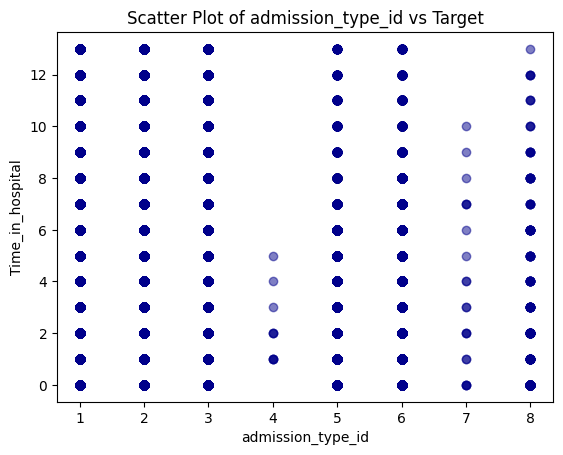

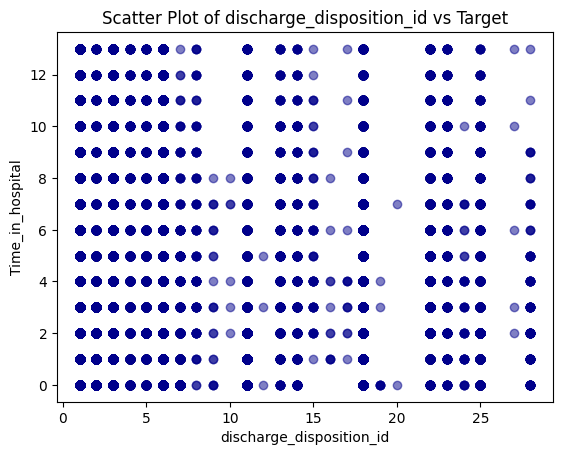

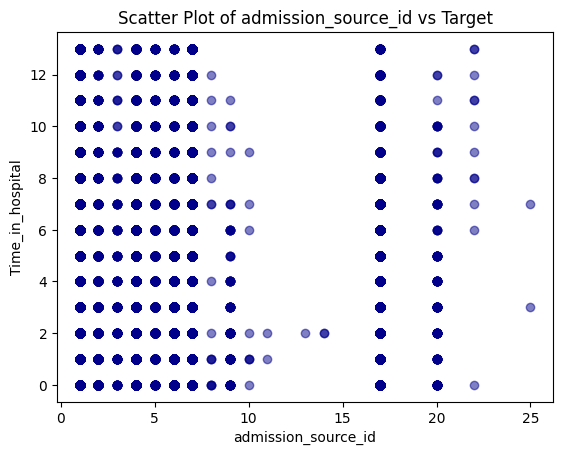

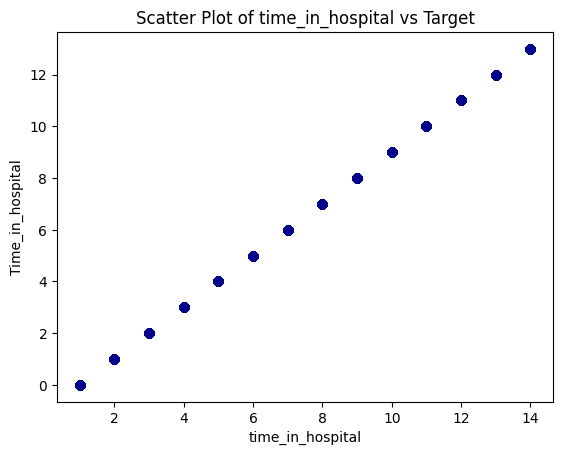

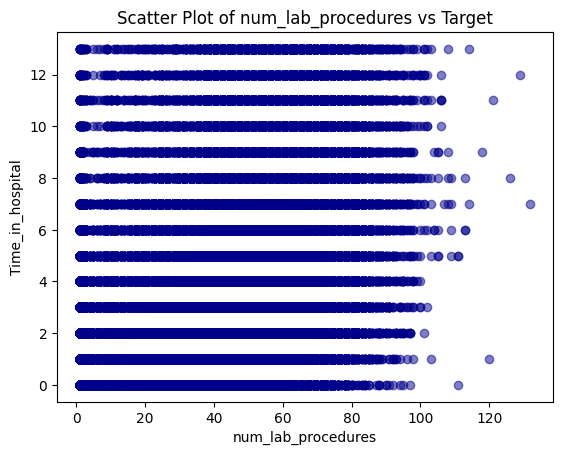

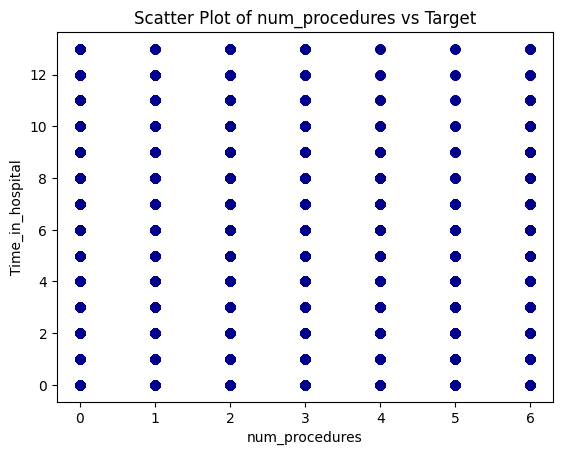

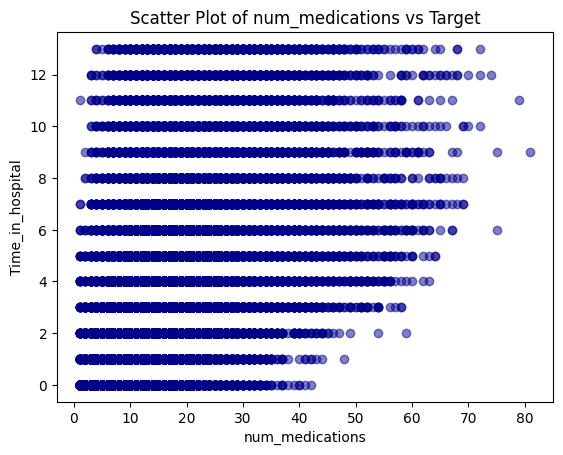

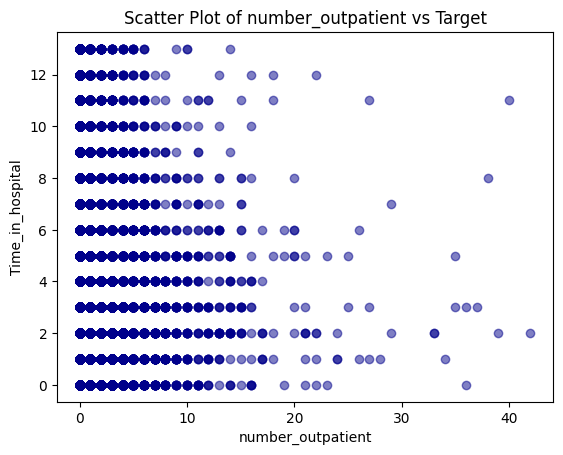

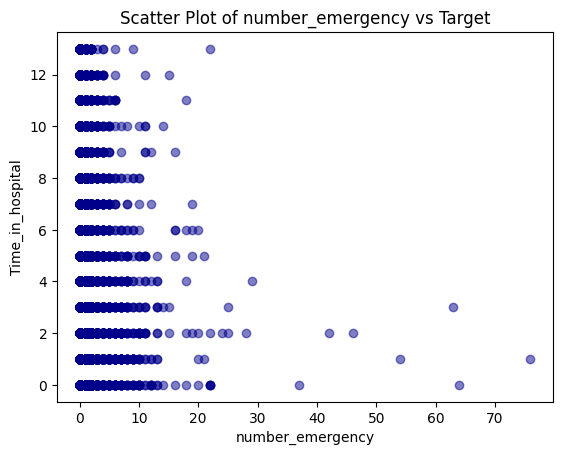

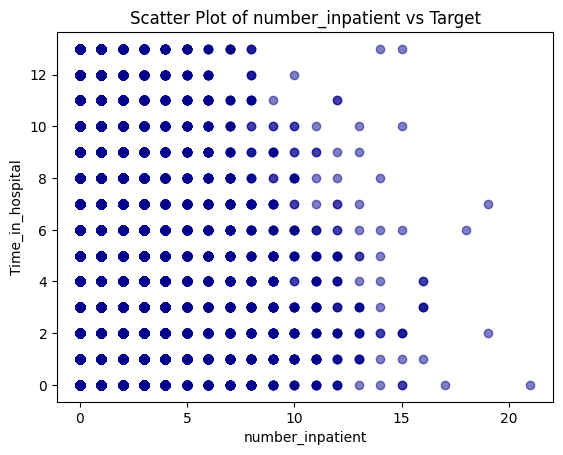

In [241]:
for column in X.columns[0:10]:
    plt.scatter(X[column], y, alpha=0.5, c='darkblue')
    plt.xlabel(column)  
    plt.ylabel("Time_in_hospital")  
    plt.title(f"Scatter Plot of {column} vs Target")
    plt.show() 



#### 3.1.4: Implement Decision Tree Regression for Non-linear Relationships

In [242]:
# importing requires sklearn packages for implementing regression
from sklearn.tree import DecisionTreeRegressor

# Initialising and training Decision Tree Regressor
tree_model = DecisionTreeRegressor(max_depth=5)
tree_model.fit(X_train, y_train)

# Predictions
y_pred_tree = tree_model.predict(X_test)

# Evaluation
mae_tree = mean_absolute_error(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = root_mean_squared_error(y_test, y_pred_tree)

print(f"Decision Tree Regression MAE: {mae_tree}")
print(f"Decision Tree Regression MSE: {mse_tree}")
print(f"Decision Tree Regression RMSE: {rmse_tree}")

Decision Tree Regression MAE: 0.0
Decision Tree Regression MSE: 0.0
Decision Tree Regression RMSE: 0.0


#### 3.1.5: Implement Gradient Boosting Regression

In [243]:
# importing requires sklearn packages for implementing Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

gboost_model = GradientBoostingRegressor(n_estimators=50, max_depth=2, random_state=100)
gboost_model.fit(X_train, y_train)

# Predictions
y_pred_gboost = gboost_model.predict(X_test)

# Evaluation
mae_gboost = mean_absolute_error(y_test, y_pred_gboost)
mse_gboost = mean_squared_error(y_test, y_pred_gboost)
rmse_gboost = root_mean_squared_error(y_test, y_pred_gboost)

print(f"Gradient Boosting Regression MAE: {mae_gboost}")
print(f"Gradient Boosting Regression MSE: {mse_gboost}")
print(f"Gradient Boosting Regression RMSE: {rmse_gboost}")  

Gradient Boosting Regression MAE: 0.022226102317447108
Gradient Boosting Regression MSE: 0.0010214893381121069
Gradient Boosting Regression RMSE: 0.031960746832827715


#### 3.1.6: Implement XGBoost Regression

In [244]:
import xgboost
from xgboost import XGBRegressor

if not isinstance(X_train, pd.DataFrame):
    X_train = pd.DataFrame(X_train)
if not isinstance(X_test, pd.DataFrame):
    X_test = pd.DataFrame(X_test)

X_train.columns = [f"feature_{i}" for i in range(X_train.shape[1])]
X_test.columns = [f"feature_{i}" for i in range(X_test.shape[1])]

# Initialize and train XGBoost Regressor
xgboost_model = xgboost.XGBRegressor()
xgboost_model.fit(X_train, y_train)

# Predictions
y_pred_xgboost = xgboost_model.predict(X_test)

# Evaluation
mae_xgboost = mean_absolute_error(y_test, y_pred_xgboost)
mse_xgboost = mean_squared_error(y_test, y_pred_xgboost)
rmse_gboost = root_mean_squared_error(y_test, y_pred_xgboost)

print(f"XGBoost Regression MAE: {mae_xgboost}")
print(f"XGBoost Regression MSE: {mse_xgboost}")
print(f"XGBoost Regression RMSE: {rmse_gboost}")


XGBoost Regression MAE: 2.996137131792899e-06
XGBoost Regression MSE: 2.3132410329362776e-11
XGBoost Regression RMSE: 4.8096164430610034e-06


#### 3.1.7: Visualise the output for non-linear regression
Try to plot histogram of features, useful information can be found [here](https://matplotlib.org/stable/gallery/statistics/hist.html)

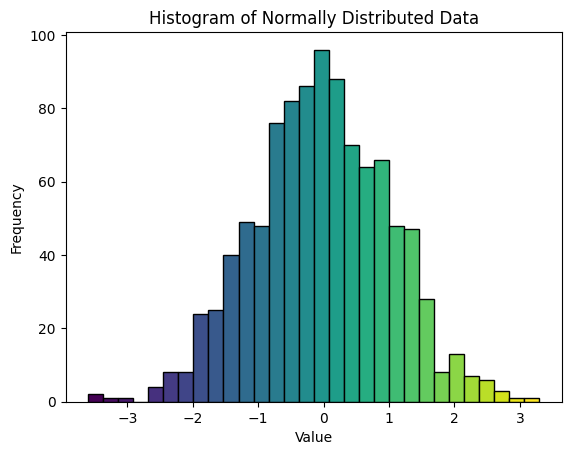

In [245]:
# Create a random number generator with a fixed seed for reproducibility
import matplotlib.colors as mcolors
rng = np.random.default_rng(19680801)
data = rng.standard_normal(1000)

fig, ax = plt.subplots()
n, bins, patches = ax.hist(data, bins=30, edgecolor='black')
bin_centers = 0.5 * (bins[:-1] + bins[1:])
norm = mcolors.Normalize(vmin=bin_centers.min(), vmax=bin_centers.max())

# Choose a colormap
cmap = plt.cm.viridis

# Apply the colormap to the normalized values
for center, patch in zip(bin_centers, patches):
    color = cmap(norm(center))
    patch.set_facecolor(color)

ax.set_xlabel('Value')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Normally Distributed Data')

plt.show()

#### 3.1.8: Evaluation and Model Comparison
compare the performance of all four models: Linear Regression, Decision Tree Regression, Gradient Boosting, and XGBoost. Summarise each model’s performance using a comparison table.


In [246]:
# comparision table
mae_linear = mean_absolute_error(y_test, y_pred)
mse_linear = mean_squared_error(y_test, y_pred)

mae_decision_tree = mean_absolute_error(y_test, y_pred_tree)
mse_decision_tree = mean_squared_error(y_test, y_pred_tree)

mae_gboost = mean_absolute_error(y_test, y_pred_gboost)
mse_gboost = mean_squared_error(y_test, y_pred_gboost)

mae_xgboost = mean_absolute_error(y_test, y_pred_xgboost)
mse_xgboost = mean_squared_error(y_test, y_pred_xgboost)

results = {
    "Model": ["Linear Regression", "Decision Tree", "Gradient Boosting", "XGBoost"],
    "MAE": [
        mae_linear,  
        mae_decision_tree,  
        mae_gboost,  
        mae_xgboost  
    ],
    "MSE": [
        mse_linear,  
        mse_decision_tree,  
        mse_gboost,  
        mse_xgboost  
    ]
}

results_df = pd.DataFrame(results)

print(results_df)

               Model           MAE           MSE
0  Linear Regression  9.737403e-07  1.399106e-09
1      Decision Tree  0.000000e+00  0.000000e+00
2  Gradient Boosting  2.222610e-02  1.021489e-03
3            XGBoost  2.996137e-06  2.313241e-11


#### Expected Output for model comparison in 3.1.8:

| Model | MAE | MSE |
|---|---|---|
| Linear Regression | -- | -- |
| Decision Tree     | -- | -- |
| Gradient Boosting | -- | -- |
| XGBoost           | -- | -- |

++++++++
### **3.2: Implementing Classification Baseline**


#### 3.2.1: Loading the data
- Use pandas to load the dataset.

In [247]:
df = pd.read_excel('diabetic_data_233172.xlsx')
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

#### 3.2.2:  Prepare Data for Classification


In [248]:
# importing required sklearn packages
from sklearn.model_selection import train_test_split

# Defining target and features
X = np.asarray(df[['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital']])
y = np.asarray(df['diabetesMed'])

# Encoding categorical variables
categorical_values = pd.Series(df['diabetesMed'].unique())
categorical_values = categorical_values.apply(lambda x: x.encode('utf-8'))
column_as_binary = (categorical_values == 'Yes').astype(int)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



#### 3.2.3:  Implement Logistic Regression as a Baseline Model

In [249]:
# importing requires sklearn packages
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialising and training Logistic Regression model
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train, y_train)

# Predictions
y_pred = logistic_model.predict(X_test)

# Evaluation
precision_regression = precision_score(y_test, y_pred, average='weighted')
recall_regression = recall_score(y_test, y_pred, average='weighted')
f1_regression = f1_score(y_test, y_pred, average='weighted')
accuracy_regression = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy_regression:.4f}")
print(f"Logistic Regression Precision: {precision_regression:.4f}")
print(f"Logistic Regression Recall: {recall_regression:.4f}")
print(f"Logistic Regression F1 Score: {f1_regression:.4f}")

c:\Users\gabri\anaconda3\envs\Block_B\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Logistic Regression Accuracy: 0.7736
Logistic Regression Precision: 0.5985
Logistic Regression Recall: 0.7736
Logistic Regression F1 Score: 0.6749


#### 3.2.4: Implement Random Forest Classifier as a Non-linear Baseline

In [250]:
# importing requires sklearn packages
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

precision_rf = precision_score(y_test, y_pred, average='weighted')
recall_rf = recall_score(y_test, y_pred, average='weighted')
f1_rf = f1_score(y_test, y_pred, average='weighted')
accuracy_rf = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest Precision: {precision_rf:.4f}")    
print(f"Random Forest Recall: {recall_rf:.4f}")
print(f"Random Forest F1 Score: {f1_rf:.4f}")


Random Forest Accuracy: 0.7692
Random Forest Precision: 0.6744
Random Forest Recall: 0.7692
Random Forest F1 Score: 0.6804


#### 3.2.5: Implement K-Nearest Neighbors (KNN) Classifier

In [251]:
# importing requires sklearn packages
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier

# Standardising the features for KNN
scaler = preprocessing.StandardScaler()
k = 6
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

# Initialising and training the KNN model
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model
knn.fit(X_train_scaled, y_train)

# Predictions
y_pred_knn = predictions = knn.predict(X_test_scaled)
 
# Evaluation
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print(f"KNN Accuracy: {accuracy_knn:.4f}")
print(f"KNN Precision: {precision_knn:.4f}")
print(f"KNN Recall: {recall_knn:.4f}")
print(f"KNN F1 Score: {f1_knn:.4f}")

KNN Accuracy: 0.7199
KNN Precision: 0.6639
KNN Recall: 0.7199
KNN F1 Score: 0.6843


#### 3.2.6: Evaluation and Model Comparison
Compare the performance of implemented models using four metrics including "Accuracy", "Precision", "Recall", and "F1-score".

In [252]:
results = {
    "Model": ["Logistic Regression", "Random Forest", "K-Nearest Neighbors"],
    "Accuracy": [
        accuracy_regression, 
        accuracy_rf, 
        accuracy_knn
    ],
    "Precision": [  
        precision_regression, 
        precision_rf, 
        precision_knn
    ],
    "Recall": [  
        recall_regression, 
        recall_rf, 
        recall_knn
    ], 
    "F1_score": [  
        f1_regression, 
        f1_rf, 
        f1_knn
    ]   
}

results_df = pd.DataFrame(results)

print(results_df)

                 Model  Accuracy  Precision    Recall  F1_score
0  Logistic Regression  0.773607   0.598468  0.773607  0.674860
1        Random Forest  0.769185   0.674435  0.769185  0.680359
2  K-Nearest Neighbors  0.719908   0.663880  0.719908  0.684306


#### Expected Output for Model Comparison in 3.2.6:
| Model | Accuracy | Precision | Recall | F1-score |
|---|---|---|---|---|
| Logistic Regression | -- | -- | -- | -- |
| Random Forest       | -- | -- | -- | -- |
| K-Nearest Neighbors | -- | -- | -- | -- |

++++++++
### **Task 3.3: Implementing Clustering Baseline**


#### 3.3.1: Load and Preprocess the Data

In [253]:
df = pd.read_excel('diabetic_data_233172.xlsx')
df.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [254]:
from sklearn.preprocessing import StandardScaler

# Standardising column names and remove duplicates
df = df.drop_duplicates()
numerical_cols = df.select_dtypes(include=['number'])
numerical_cols = numerical_cols.fillna(0)

# Apply StandardScaler
scaler_values = StandardScaler().fit_transform(numerical_cols)

# Create a DataFrame with the scaled values
df = pd.DataFrame(scaler_values, columns=numerical_cols.columns)

print("Cleaned and Standardized DataFrame:")
print(df.head())

Cleaned and Standardized DataFrame:
   encounter_id  patient_nbr  admission_type_id  discharge_disposition_id  \
0     -1.587330    -1.191545           2.750800                  4.031022   
1     -1.608075     0.033564          -0.708461                 -0.514312   
2     -1.608901     0.819654          -0.708461                 -0.514312   
3     -1.604653     0.726480          -0.708461                 -0.514312   
4     -1.609366    -0.305227          -0.708461                 -0.514312   

   admission_source_id  time_in_hospital  num_lab_procedures  num_procedures  \
0            -1.169873         -1.137649           -0.106517       -0.785398   
1             0.306482         -0.467653            0.808384       -0.785398   
2             0.306482         -0.802651           -1.631351        2.145781   
3             0.306482         -0.802651            0.045967       -0.199162   
4             0.306482         -1.137649            0.401761       -0.785398   

   num_medications  

#### 3.3.2: Implement K-Means Clustering

In [255]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

n_clusters=3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the model and predict clusters
clusters = kmeans.fit_predict(df)

# Evaluate the clustering with Silhouette Score
silhouette_avg = silhouette_score(df, clusters)

# Print the Silhouette Score
print(f"K-Means Silhouette Score: {silhouette_avg:.4f}")

K-Means Silhouette Score: 0.1402


#### 3.3.3: Apply PCA for Dimensionality Reduction

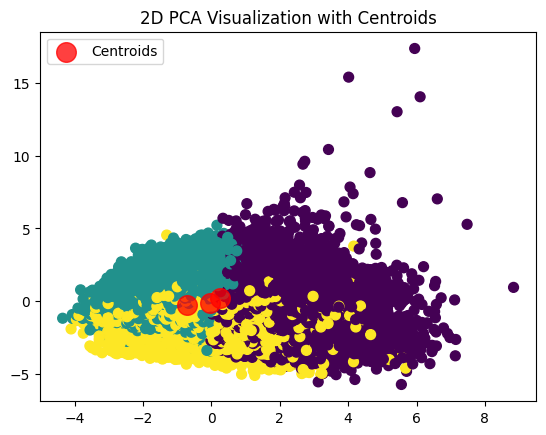

C:\Users\gabri\AppData\Local\Temp\ipykernel_19704\2045709918.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


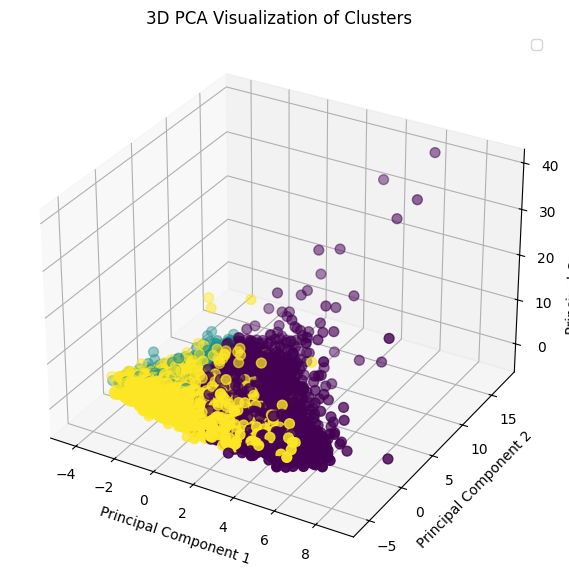

In [256]:
from sklearn.decomposition import PCA

clusters = kmeans.labels_

# Apply PCA with 2 components for 2D visualization
pca_2d = PCA(n_components=2)
X_pca_2 = pca_2d.fit_transform(df)

# Apply PCA with 3 components for 3D visualization
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(df)

# Set Dark2 color palette
colors = sns.color_palette("viridis", np.unique(clusters).size)

# 2D Scatter Plot
centers = kmeans.cluster_centers_
plt.scatter(X_pca_2[:, 0], X_pca_2[:, 1], c=clusters, cmap='viridis', s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, label='Centroids')
plt.title('2D PCA Visualization with Centroids')
plt.legend()
plt.show()

# 3D Scatter Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=clusters, cmap='viridis', s=50)
ax.set_title("3D PCA Visualization of Clusters")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
plt.legend()
plt.show() 

#### 3.3.4: Implement Random Hierarchical Clustering

In [257]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Initialize and fit hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
sample_data = scaler_values[:10000]
clusters = hierarchical.fit_predict(sample_data)

# Evaluate with Silhouette Score
hierarchical_silhouette = silhouette_score(sample_data, clusters)
print(f"Hierarchical Clustering Silhouette Score: {hierarchical_silhouette:.4f}")


Hierarchical Clustering Silhouette Score: 0.2611


#### 3.3.5: Implement DBSCAN for Density-Based Clustering

In [258]:
from sklearn.cluster import DBSCAN

# Initialising and fiting DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(df)

# Filtering noise points (labeled as -1)
filtered_clusters = clusters[clusters != -1]
filtered_data = df[clusters != -1]

# Evaluate with Silhouette Score (excluding noise)
if len(set(filtered_clusters)) > 1:  # Silhouette score requires at least 2 clusters
    silhouette_avg_db = silhouette_score(filtered_data, filtered_clusters)
    print(f"DBSCAN Silhouette Score (excluding noise): {silhouette_avg_db:.4f}")
else:
    print("Not enough clusters to compute Silhouette Score.")

DBSCAN Silhouette Score (excluding noise): -0.1321


#### 3.3.6: Evaluation and Model Comparison

In [259]:
# Summary of Silhouette Scores
results = {
    "Clustering Method": ["K-Means", "Hierarchical", "DBSCAN"],
    "Silhouette Score": [
        f"{silhouette_avg:.4f}", 
        f"{hierarchical_silhouette:.4f}", 
        f"{silhouette_avg_db:.4f}"]
}

results = pd.DataFrame(results)

print(results)

  Clustering Method Silhouette Score
0           K-Means           0.1402
1      Hierarchical           0.2611
2            DBSCAN          -0.1321


#### Expected Output for Model Comparison in 3.3.6:
| Clustering Method | Silhouette Score |
|     ---           |    --   |
| K-Means           |  |
| Hierarchical      |  |
| DBSCAN            |  |

++++++++++
### **3.4 Feature Engineering and Feature Selection**
Select the most relevant features to improve model performance

#### 3.4.1: Feature Engineering

In [260]:
df = pd.read_excel('diabetic_data_233172.xlsx')
print(df.head)

<bound method NDFrame.head of         encounter_id  patient_nbr             race  gender      age weight  \
0            2278392      8222157        Caucasian  Female   [0-10)      ?   
1             149190     55629189        Caucasian  Female  [10-20)      ?   
2              64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3             500364     82442376        Caucasian    Male  [30-40)      ?   
4              16680     42519267        Caucasian    Male  [40-50)      ?   
...              ...          ...              ...     ...      ...    ...   
101761     443847548    100162476  AfricanAmerican    Male  [70-80)      ?   
101762     443847782     74694222  AfricanAmerican  Female  [80-90)      ?   
101763     443854148     41088789        Caucasian    Male  [70-80)      ?   
101764     443857166     31693671        Caucasian  Female  [80-90)      ?   
101765     443867222    175429310        Caucasian    Male  [70-80)      ?   

        admission_type_id  discha

In [299]:
# chi-square testing
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

X = df[['time_in_hospital', 'race', 'admission_type_id']]
y = df['insulin']
X['race_encoded'] = label_encoder.fit_transform(X['race'])
X = X.drop(columns=['race'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.5, random_state=42)

# Perform Chi-square test
chi_scores = chi2(X[['race_encoded']], y_encoded)
print("Chi-Square Scores:", chi_scores[0])
print("P-values:", chi_scores[1])

Chi-Square Scores: [108.04947741]
P-values: [2.8844999e-23]


C:\Users\gabri\AppData\Local\Temp\ipykernel_19704\4240164527.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['race_encoded'] = label_encoder.fit_transform(X['race'])


In [262]:
"""Race has a significant relationship with insulin and is a good candidate to include."""



'Race has a significant relationship with insulin and is a good candidate to include.'

#### 3.4.2: Generate Statistical Features
Calculate aggregate statistics such as mean, max, min, or standard deviation for features if relevant

In [291]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

numerical_cols = ['admission_type_id', 'time_in_hospital', ]  

scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

print(X[numerical_cols].head())


   admission_type_id  time_in_hospital
0           2.750800         -1.137649
1          -0.708461         -0.467653
2          -0.708461         -0.802651
3          -0.708461         -0.802651
4          -0.708461         -1.137649


In [289]:
scaler = MinMaxScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

print(X[numerical_cols].head())

   admission_type_id  time_in_hospital
0           0.714286          0.000000
1           0.000000          0.153846
2           0.000000          0.076923
3           0.000000          0.076923
4           0.000000          0.000000


In [280]:
X['row_mean'] = X[numerical_cols].mean(axis=1)
X['row_max'] = X[numerical_cols].max(axis=1)
X['row_min'] = X[numerical_cols].min(axis=1)
X['row_std'] = X[numerical_cols].std(axis=1)

print(X[['row_mean', 'row_max', 'row_min', 'row_std']].head())

   row_mean   row_max  row_min   row_std
0  0.357143  0.714286      0.0  0.505076
1  0.076923  0.153846      0.0  0.108786
2  0.038462  0.076923      0.0  0.054393
3  0.038462  0.076923      0.0  0.054393
4  0.000000  0.000000      0.0  0.000000


C:\Users\gabri\AppData\Local\Temp\ipykernel_19704\188219790.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['row_mean'] = X[numerical_cols].mean(axis=1)
C:\Users\gabri\AppData\Local\Temp\ipykernel_19704\188219790.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['row_max'] = X[numerical_cols].max(axis=1)
C:\Users\gabri\AppData\Local\Temp\ipykernel_19704\188219790.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

#### 3.4.3: Feature Transformation
Normalise or standardise features, especially for distance-based models like KNN or clustering

In [282]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standardize numerical columns
numerical_cols = ['time_in_hospital', "admission_type_id"]

scaler = StandardScaler()

X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

print(X[numerical_cols].head())
print(X[numerical_cols].mean())
print(X[numerical_cols].std())


   time_in_hospital  admission_type_id
0         -1.137649           2.750800
1         -0.467653          -0.708461
2         -0.802651          -0.708461
3         -0.802651          -0.708461
4         -1.137649          -0.708461
time_in_hospital     4.580273e-17
admission_type_id    8.266834e-17
dtype: float64
time_in_hospital     1.000005
admission_type_id    1.000005
dtype: float64


C:\Users\gabri\AppData\Local\Temp\ipykernel_19704\564199877.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_cols] = scaler.fit_transform(X[numerical_cols])


#### 3.4.4: Feature Selection
Use feature importance from tree-based models (Random Forest, Gradient Boosting) to select important features


In [300]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

y_train_encoded = label_encoder.fit_transform(y_train)
# Fit Random Forest model
model = RandomForestRegressor(random_state= 42)
model.fit(X_train, y_train_encoded)

# Get feature importance
importances = model.feature_importances_
feature_names = X.columns
sorted_idx = np.argsort(importances[::-1])
sorted_features = feature_names[sorted_idx]
sorted_importances = importances[sorted_idx]



#### 3.4.5: Model Evaluation After Feature Selection
- After feature engineering and selection, evaluate your model with the new set of features.
- Apply cross-validation to measure the model’s performance with the refined feature set

In [293]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

model = LogisticRegression(random_state= 42)
cv_scores = cross_val_score(model, X_train, y_train, cv = 5, scoring= 'accuracy')

print("Cross-validated accuracy after feature selection:", cv_scores.mean())

Cross-validated accuracy after feature selection: 0.46701251643087166


+++++++++
### **Task 3.5: Hyperparameter Tuning**
Improve the quality of your implementations


#### 3.5.1: GridSearchCV for Systematic Hyperparameter Tuning
- Define Hyperparameter Grid for Different Models
- Define grids of hyperparameters for models such as Logistic Regression (for classification) and K-Means (for clustering).

In [294]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, silhouette_score
from sklearn.linear_model import Ridge

# Define hyperparameter grid for Ridge Regression (i'm using ridge regression due to the chosen columns)
ridge_grid = {
    'alpha': [0.1, 1.0, 10.0],
    'solver': ['auto', 'svd', 'cholesky']
}

#### 3.5.2 Apply GridSearchCV with Cross-Validation
- Use GridSearchCV with cross-validation to perform hyperparameter tuning on both models.

In [301]:
ridge_search = GridSearchCV(
    estimator=Ridge(),
    param_grid=ridge_grid,
    scoring='neg_mean_squared_error',  
    cv=5                               
)

# Fit Ridge Regression GridSearchCV
ridge_search.fit(X_train, y_train_encoded)
print("Best Ridge Regression Parameters:", ridge_search.best_params_)
print("Best Score:", -ridge_search.best_score_) 

Best Ridge Regression Parameters: {'alpha': 10.0, 'solver': 'auto'}
Best Score: 0.7021079287382099


#### 3.5.3: Nested Cross-Validation to Validate Stability of Hyperparameters

In [302]:
from sklearn.model_selection import cross_val_score

# Logistic Regression Nested Cross-Validation
nested_cv_score_logistic = cross_val_score(logistic_model, X_train, y_train, cv = 5)
print("Nested CV Accuracy for Logistic Regression:", nested_cv_score_logistic)

Nested CV Accuracy for Logistic Regression: [0.4665422  0.46909698 0.46752481 0.4660967  0.46580189]


#### 3.5.4: Evaluate Tuned Models with Multiple Metrics
- Evaluate the tuned Logistic Regression model on both training and test sets.
- Use multiple metrics for classification (accuracy, F1-score) and clustering (silhouette score, Calinski-Harabasz).

In [307]:
from sklearn.metrics import r2_score

# Ridge Regression evaluation
y_train_pred = ridge_search.best_estimator_.predict(X_train)
y_test_pred = ridge_search.best_estimator_.predict(X_test)
y_test_encoded = label_encoder.fit_transform(y_test)
# Metrics
train_mse = mean_squared_error(y_train_encoded, y_train_pred)
test_mse = mean_squared_error(y_test_encoded, y_test_pred)
train_mae = mean_absolute_error(y_train_encoded, y_train_pred)
test_mae = mean_absolute_error(y_test_encoded, y_test_pred)
train_r2 = r2_score(y_train_encoded, y_train_pred)
test_r2 = r2_score(y_test_encoded, y_test_pred)

# Print Results
print(f"Ridge Regression - Train MSE: {train_mse:.4f}")
print(f"Ridge Regression - Test MSE: {test_mse:.4f}")
print(f"Ridge Regression - Train MAE: {train_mae:.4f}")
print(f"Ridge Regression - Test MAE: {test_mae:.4f}")
print(f"Ridge Regression - Train R2: {train_r2:.4f}")
print(f"Ridge Regression - Test R2: {test_r2:.4f}")


Ridge Regression - Train MSE: 0.7020
Ridge Regression - Test MSE: 0.7010
Ridge Regression - Train MAE: 0.7116
Ridge Regression - Test MAE: 0.7115
Ridge Regression - Train R2: 0.0030
Ridge Regression - Test R2: 0.0030


+++++++++
### **Task 3.6: Model Selection**
- Compare and evaluate the implemented models and select the best ones.

#### 3.6.1: Compare and Choose the Best Model
- Compare the models using evaluation metrics (e.g., MSE for regression, F1-score for classification, Silhouette Score for clustering).
- Summarise the performance metrics of each model in a table and choose the model with the best performance for each task.

In [308]:
# Sample model comparison
results = {
    "Model": ["Linear Regression", "Random Forest", "KMeans", "Ridge Regression"],
    "MAE": [mae_linear, f1_rf, "N/A", test_mae],
    "MSE": [mse_linear, precision_rf, "N/A", test_mse],
    "Silhouette Score": ["N/A", "N/A", silhouette_avg, "N/A"]
}

results_df = pd.DataFrame(results)

from tabulate import tabulate
print(tabulate(results_df, headers='keys', tablefmt='pretty'))

+---+-------------------+-----------------------+------------------------+---------------------+
|   |       Model       |          MAE          |          MSE           |  Silhouette Score   |
+---+-------------------+-----------------------+------------------------+---------------------+
| 0 | Linear Regression | 9.737403332697239e-07 | 1.3991062718924435e-09 |         N/A         |
| 1 |   Random Forest   |  0.6803587844526102   |   0.6744347232783963   |         N/A         |
| 2 |      KMeans       |          N/A          |          N/A           | 0.14018696222660212 |
| 3 | Ridge Regression  |  0.7115302872758326   |   0.7009644520396385   |         N/A         |
+---+-------------------+-----------------------+------------------------+---------------------+


#### 3.6.2: Finalise and Save the Best Model
- Once the best model is identified, retrain it on the full dataset and save it using joblib for future use.

In [309]:
import joblib


param_grid = { 'C' : [0.1, 1, 10]}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv = 5)
grid_search.fit(X_train, y_train)
# Save the best model
joblib.dump(grid_search.best_estimator_, "best_model.pkl")

['best_model.pkl']

____________
## *Task 4: Mathematics for Machine Learning

#### 4.1: Implementing Linear Regression with Numpy from Scratch

https://github.com/BredaUniversityADSAI/2024-25b-fai1-adsai-GabrielJukema233172/commit/bec51a07dbb3a24575d7684d9539f7241505fe57

#### 4.2: Implement Logistic Regression with Numpy from Scratch

https://github.com/BredaUniversityADSAI/2024-25b-fai1-adsai-GabrielJukema233172/commit/d42e4689c308760dafe14dc25a59c3e849ab4039

____________
## *Task 5: Final Report for Your Creative Brief Project

https://edubuas-my.sharepoint.com/:w:/g/personal/233172_buas_nl/EcLJtOGTGi9Boyrh7iLP8dYBEd0EudlcaGFW74I62wevXw?e=VucC8d